In [1]:
import numpy as np
import healpy as hp
from astropy.coordinates import cartesian_to_spherical
from src.Calculators.casters import THE_TRIPLE_CASTER
from src.Calculators.legion_of_casters import THROUPLE_S_CASTERS
import matplotlib.pyplot as plt

In [2]:
m = 6
fix = 881
G = 6.6743e-11 # SI
NSIDE = 4
Msol = 1.98847e30 # kg
Rsol = 6.957e8 # m
t = np.sqrt(Rsol**3 / (Msol*G )) # Follows from G = 1
c = 3e8 * t/Rsol # simulator units. Need these for the PW potential
c_cgs = 3e10 # [cm/s]
Msol_to_g = 1.989e33 # [g]
Rsol_to_cm = 6.957e10 # [cm]
den_converter = Msol_to_g / Rsol_to_cm**3

fix = str(fix)
Mbh = 10**m 
Rt =  Mbh**(1/3) # Msol = 1, Rsol = 1

In [3]:
thetas = np.zeros(192)
phis = np.zeros(192)
observers = []
for i in range(0,192):
    thetas[i], phis[i] = hp.pix2ang(NSIDE, i)
    thetas[i] -= np.pi/2
    observers.append( (thetas[i], phis[i]) )


In [4]:
radius = np.linspace(0.2*Rt, 10_000, 750)

In [5]:
# for moll we want: theta in [-pi/2, pi/2], phi in [-pi,pi]
print('phi min:', np.min(phis))
print('phi max:', np.max(phis))
print('theta min:', np.min(thetas))
print('theta max:', np.max(thetas))

phi min: 0.0
phi max: 6.086835766330223
theta min: -1.3663161278263616
theta max: 1.3663161278263618


In [6]:
# phi_grid, theta_grid = np.meshgrid(phis,thetas)
# radius = 3 * phi_grid/phi_grid
# print(radius)
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1, projection='3d')
# plot = ax.plot_surface(phi_grid, theta_grid, radius, cmap ='cet_fire')
# plt.show()

In [7]:
# Import: the origin is in (0,0,0), i.e. the black hole
X = np.load( str(m) + '/'  + fix + '/CMx_' + fix + '.npy')
Y = np.load( str(m) + '/'  + fix + '/CMy_' + fix + '.npy')
Z = np.load( str(m) + '/'  + fix + '/CMz_' + fix + '.npy')
Mass = np.load( str(m) + '/'  + fix + '/Mass_' + fix + '.npy')
T = np.load( str(m) + '/'  + fix + '/T_' + fix + '.npy')
Den = np.load( str(m) + '/'  + fix + '/Den_' + fix + '.npy')
Rad = np.load( str(m) + '/'  +fix + '/Rad_' + fix + '.npy')

In [8]:
Den *= den_converter 
R, THETA, PHI = cartesian_to_spherical(X,Y,Z)
R = R.value 
THETA = THETA.value #from -pi/2 to pi/2
PHI = PHI.value

In [9]:
# have to be in the same range of phis and thetas
print('phi min simul:', np.min(PHI))
print('phi max simul:', np.max(PHI))
print('theta min simul:', np.min(THETA))
print('theta max simul:', np.max(THETA))

phi min simul: 3.102841449198838e-07
phi max simul: 6.283181288613724
theta min simul: -1.56902225202048
theta max simul: 1.5681879547097137


In [10]:
T_casted, Den_casted, Rad_casted = THROUPLE_S_CASTERS(radius, R, observers, THETA, PHI, T, Den, Rad, weights = Mass, avg = False)

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [11]:
print('phi min simul:', np.min(PHI))
print('phi max simul:', np.max(PHI))
print('theta min simul:', np.min(THETA))
print('theta max simul:', np.max(THETA))

phi min simul: 3.102841449198838e-07
phi max simul: 6.283181288613724
theta min simul: -1.56902225202048
theta max simul: 1.5681879547097137


In [13]:
# Use only the point on the equatorial plane (theta = 0 if theta is from -pi/2 to pi/2)
T_to_plot = []
Den_to_plot = []
phis_to_plot = []
for i in range(192):
    if thetas[i] == 0:
        print('found')
        T_to_plot.append(T_casted[:,i])
        Den_to_plot.append(Den_casted[:,i])
        phis_to_plot.append(phis[i])


found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found


In [14]:
# To convert in cartesian by hand: phis longitude, thetas latitude where theta in[0,pi] (0 in z axis) and phi in [0,2pi) (0 in x axis)
thetas  += np.pi/2
THETA += np.pi/2

In [15]:
print('phi min simul:', np.min(PHI))
print('phi max simul:', np.max(PHI))
print('theta min simul:', np.min(THETA))
print('theta max simul:', np.max(THETA))
print(np.shape(T_to_plot))

phi min simul: 3.102841449198838e-07
phi max simul: 6.283181288613724
theta min simul: 0.0017740747744166008
theta max simul: 3.1389842815046105
(16, 750)


In [16]:
# Pericenter: X = Rt, Y = 0 = Z
# R = sqrt, theta = arccos(z/r), phi = sgn(y)*arccos(x/sqrt(x^2+y^2))
r_peric = Rt
theta_peric = np.pi/2
phi_peric = 0

r_bh = 0
theta_bh = np.pi/2
phi_bh = np.pi/2


In [17]:
Xpolar = np.cos(phis_to_plot)
Ypolar = np.sin(phis_to_plot)

In [37]:
stop = np.argmin(np.abs(Rt-radius))
apocenter = 2*Rt
print(stop)


6


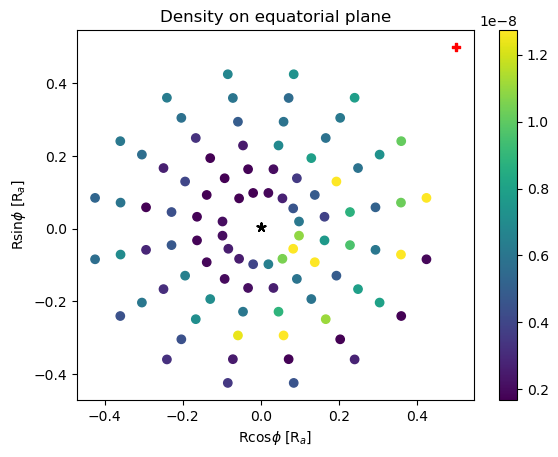

In [46]:
fig, ax = plt.subplots()
for index in range(0,stop):
    to_plot = np.transpose(Den_to_plot)[index]
    img = plt.scatter(radius[index]*Xpolar/apocenter, radius[index]*Ypolar/apocenter, c = to_plot)
plt.scatter(Rt*np.cos(phi_peric)/apocenter, Rt*np.sin(theta_peric)/apocenter, c = 'r', marker= 'P')
plt.scatter(np.cos(phi_bh)/apocenter, np.sin(theta_bh)/apocenter, c = 'black', marker= (5,2))
plt.xlabel(r'Rcos$\phi$ [R$_a$]')
plt.ylabel(r'Rsin$\phi$ [R$_a$]')
plt.title('Density on equatorial plane')
plt.colorbar(img)
plt.show()

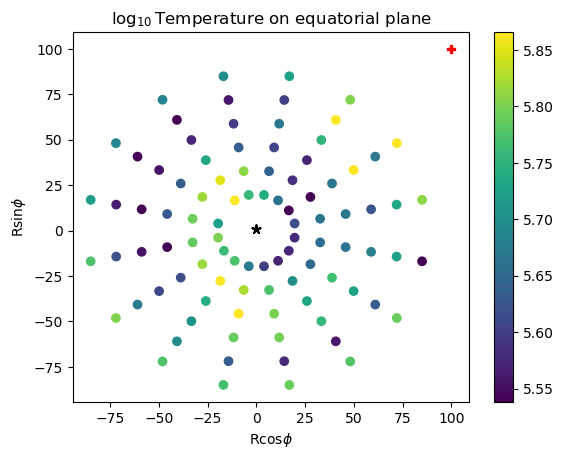

In [27]:
fig, ax = plt.subplots()
for index in range(0,stop):
    to_plot = np.transpose(T_to_plot)[index]
    img = plt.scatter(radius[index]*Xpolar, radius[index]*Ypolar, c = np.log10(to_plot))
plt.scatter(Rt*np.cos(phi_peric), Rt*np.sin(theta_peric), c = 'r', marker= 'P')
plt.scatter(np.cos(phi_bh), np.sin(theta_bh), c = 'black', marker= (5,2))
plt.xlabel('Rcos$\phi$')
plt.ylabel('Rsin$\phi$')
plt.title(r'$\log_{10}$Temperature on equatorial plane')
plt.colorbar(img)
plt.show()

In [33]:
# xcoord = radius/np.sqrt(3)
# ycoord = radius/np.sqrt(3)
# zcoord = radius/np.sqrt(3)
# Temp3d =  THE_TRIPLE_CASTER(radius, X, radius, Y, zcoord, Z, T, weights = None, avg = False)

THE CASTER IS 10 % DONE
THE CASTER IS 20 % DONE
THE CASTER IS 30 % DONE
THE CASTER IS 40 % DONE
THE CASTER IS 50 % DONE
THE CASTER IS 60 % DONE
THE CASTER IS 70 % DONE
THE CASTER IS 80 % DONE
THE CASTER IS 90 % DONE
THE CASTER IS 100 % DONE


In [35]:
# # Use only the point on the equatorial plane (theta = 0 if theta is from -pi/2 to pi/2)
# T3d_to_plot = []
# xcoord_to_plot = []
# ycoord_to_plot = []
# for i in range(750):
#     if zcoord[i] == 0:
#         print('found')
#         T3d_to_plot.append(Temp3d[:,:,i])
#         xcoord_to_plot.append(xcoord[i])
#         ycoord_to_plot.append(ycoord[i])

In [34]:
# stop3d = np.argmin(np.abs(Rt-radius))
# print(stop)

6


In [ ]:
# fig, ax = plt.subplots()
# for index in range(0,stop3d):
#     to_plot = np.transpose(T3d_to_plot)[index]
#     img = plt.scatter(xcoord_to_plot, ycoord_to_plot, c = np.log10(to_plot))
# plt.scatter(Rt*np.cos(phi_peric), Rt*np.sin(theta_peric), c = 'r', marker= 'P')
# plt.scatter(np.cos(phi_bh), np.sin(theta_bh), c = 'black', marker= (5,2))
# plt.xlabel('Rcos$\phi$')
# plt.ylabel('Rsin$\phi$')
# plt.title(r'$\log_{10}$Temperature on equatorial plane')
# plt.colorbar(img)
# plt.show()